# ALEPH Open Data Event and Track Selection Studies

### Imports

In [212]:
import os

import energyflow as ef
import energyflow.archs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import modplot

### Plot Style

In [213]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = False

## Event Selection Studies

In [214]:
aleph_path = '/callisto/ALEPH'

# load data, currently just get thrust values
thrust_arrs = []
thrust_arrsPreSel = []
years = ['1992', '1993', '1994', '1995']
stat = {
    '':[],
    'nEvents':[],
    'nEventsPassEventSel':[],
    'eventSelPerc':[],
    'ThrustAvgPreEventSel':[],
    'ThrustStdDevPreEventSel':[],
    'ThrustAvgPostEventSel':[],
    'ThrustStdDevPostEventSel':[]
}

for year in years:
    data_file = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
    All = data_file['t']['passesAll'].array()
    event_mask = All
    thrust_arrsPreSel.append(data_file['t']['Thrust'].array())
    thrust_arrs.append(data_file['t']['Thrust'].array()[event_mask])
    # populate the event stats
    tPre = data_file['t']['Thrust'].array()
    tPost = data_file['t']['Thrust'].array()[event_mask]
    stat[''].append('LEP {}'.format(year))
    stat['nEvents'].append(len(tPre))
    stat['nEventsPassEventSel'].append(len(tPost))
    stat['eventSelPerc'].append(len(tPost) / len(tPre))
    stat['ThrustAvgPreEventSel'].append(np.average(tPre))
    stat['ThrustStdDevPreEventSel'].append(np.std(tPre))
    stat['ThrustAvgPostEventSel'].append(np.average(tPost))
    stat['ThrustStdDevPostEventSel'].append(np.std(tPost))
    # populate the passes dictionary [nEvent, nEvent after cut]
    passes[''].append('LEP {}'.format(year))
    passes['Raw nEvent'].append(len(tPre))
    for mask in passes.keys():
        if mask.find('passes'): continue
        eSel = data_file['t'][mask].array()
        passes[mask].append(len(tPre[eSel])/len(tPre))

# dictionary to hold observable values
nature = {'data_thrusts': np.concatenate(thrust_arrs)}
nature1992 = {'data_thrusts': thrust_arrs[0]}
nature1993 = {'data_thrusts': thrust_arrs[1]}
nature1994 = {'data_thrusts': thrust_arrs[2]}
nature1995 = {'data_thrusts': thrust_arrs[3]}
natureYears = [nature1992,nature1993,nature1994,nature1995]

# Construct data frame
# Add in stat for all years
tPre = np.concatenate(thrust_arrsPreSel)
tPost = np.concatenate(thrust_arrs)
stat[''].append('LEP All Years')
stat['nEvents'].append(len(tPre))
stat['nEventsPassEventSel'].append(len(tPost))
stat['eventSelPerc'].append(len(tPost) / len(tPre))
stat['ThrustAvgPreEventSel'].append(np.average(tPre))
stat['ThrustStdDevPreEventSel'].append(np.std(tPre))
stat['ThrustAvgPostEventSel'].append(np.average(tPost))
stat['ThrustStdDevPostEventSel'].append(np.std(tPost))
# Double check that total number of events equals sum of all of the years before and after the cuts
print(np.sum([stat['nEvents'][i] for i in range(0,len(stat['nEvents'])-1)]) == stat['nEvents'][-1])
print(np.sum([stat['nEventsPassEventSel'][i] for i in range(0,len(stat['nEventsPassEventSel'])-1)]) == stat['nEventsPassEventSel'][-1])

True
True


In [215]:
print(passes)
# construct the data frame
passes_df = pd.DataFrame.from_dict(passes)
passes_df.set_index('')

{'': ['LEP 1992', 'LEP 1993', 'LEP 1994', 'LEP 1995'], 'Raw nEvent': [14024, 538601, 1365440, 595095], 'passesNTupleAfterCut': [1.0, 1.0, 1.0, 1.0], 'passesTotalChgEnergyMin': [1.0, 0.9997939105200324, 0.999800796812749, 0.9998067535435519], 'passesNTrkMin': [0.9997147746719909, 0.9998700336612817, 0.9998505976095617, 0.9998874129340694], 'passesSTheta': [0.9766828294352539, 0.9770516579063165, 0.9768770506210452, 0.9772254850065956], 'passesMissP': [0.9715487735310896, 0.972796188644284, 0.972934731661589, 0.9730849696266982], 'passesISR': [0.98937535653166, 0.9899443187071691, 0.989827454886337, 0.9897142473050521], 'passesWW': [0.98937535653166, 0.9897753624668354, 0.9897842453714554, 0.9895310832724187], 'passesNeuNch': [0.994438106103822, 0.9946453868448072, 0.9945673189594563, 0.9945319654845025], 'passesAll': [0.9454506560182544, 0.9470015837326704, 0.9470698089992969, 0.9474016753627572]}


,Raw nEvent,passesNTupleAfterCut,passesTotalChgEnergyMin,passesNTrkMin,passesSTheta,passesMissP,passesISR,passesWW,passesNeuNch,passesAll
,,,,,,,,,,
LEP 1992,14024,1.0,1.000000,0.999715,0.976683,0.971549,0.989375,0.989375,0.994438,0.945451
LEP 1993,538601,1.0,0.999794,0.999870,0.977052,0.972796,0.989944,0.989775,0.994645,0.947002
LEP 1994,1365440,1.0,0.999801,0.999851,0.976877,0.972935,0.989827,0.989784,0.994567,0.947070
LEP 1995,595095,1.0,0.999807,0.999887,0.977225,0.973085,0.989714,0.989531,0.994532,0.947402


## Track Selection Studies


In [194]:
aleph_path = '/callisto/ALEPH'

# The track selection is implemented in the high purity bit
trkSel = {'':['Cut'],
          'pwflag':[2],
          'd0':[2],
          'z0':[10],
          'ntpc':[4],
          'theta':[0.94],
          'pt':[0.2],
          'highPurity':[1]    
}

In [195]:
# Define histogram options
trkSel_hists = {}
trkSel_xLims = {'pwflag':[(0,10),11],
          'd0':[(-2.5,2.5),50],
          'z0':[(-16,16),320],
          'ntpc':[(0,22),44],
          'theta':[(-1.1,1.1),22],
          'pt':[(0,20),200],
          'highPurity':[(0,2),2]    
}
for key in trkSel.keys():
    if key == '': continue
    xLabel = key
    if key == 'theta': xLabel = r'cos($\theta_{ch}$)'
    trkSel_hists.setdefault(key,{}).update({
            'xlim': trkSel_xLims[key][0], 'ylim': (0,1.0), 'ylim_ratio': (0.7,1.3),
            'xlabel': xLabel, 'ylabel': r'Normalized Cross Section', 'ylabel_ratio':"TEST",
            'legend_loc': 'lower left', 'legend_ncol': 1,
            'ratio_plot': False
    })


histStyle = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
legend_opts = {'handlelength': 2.0, 'loc': 'lower left', 'frameon': False, 'numpoints': 1}

In [205]:
# Plotting phase
years = ['1992', '1993', '1994', '1995']

pwflag_counts = {
    '':['CHARGED_TRACK', 'CHARGED_LEPTONS1', 'CHARGED_LEPTONS2', 'V0', 'PHOTON', 'NEUTRAL_HADRON'],
    '1992':[],
    '1993':[],
    '1994':[],
    '1995':[]
}

counts = {'':['Cut','1992','% w/ Cut','1993','% w/ Cut','1994','% w/ Cut','1995','% w/ Cut'],
          'pwflag':[2],
          'd0':[2],
          'z0':[10],
          'ntpc':[4],
          'theta':[0.94],
          'pt':[0.2],
          'highPurity':[1]    
}

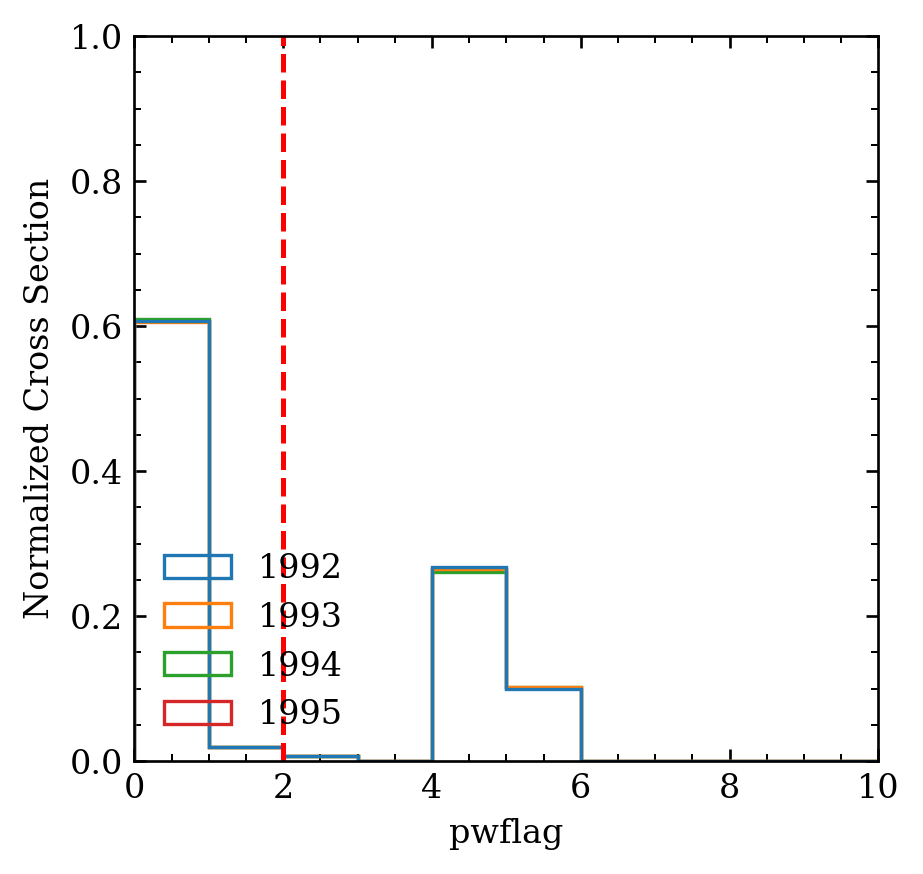

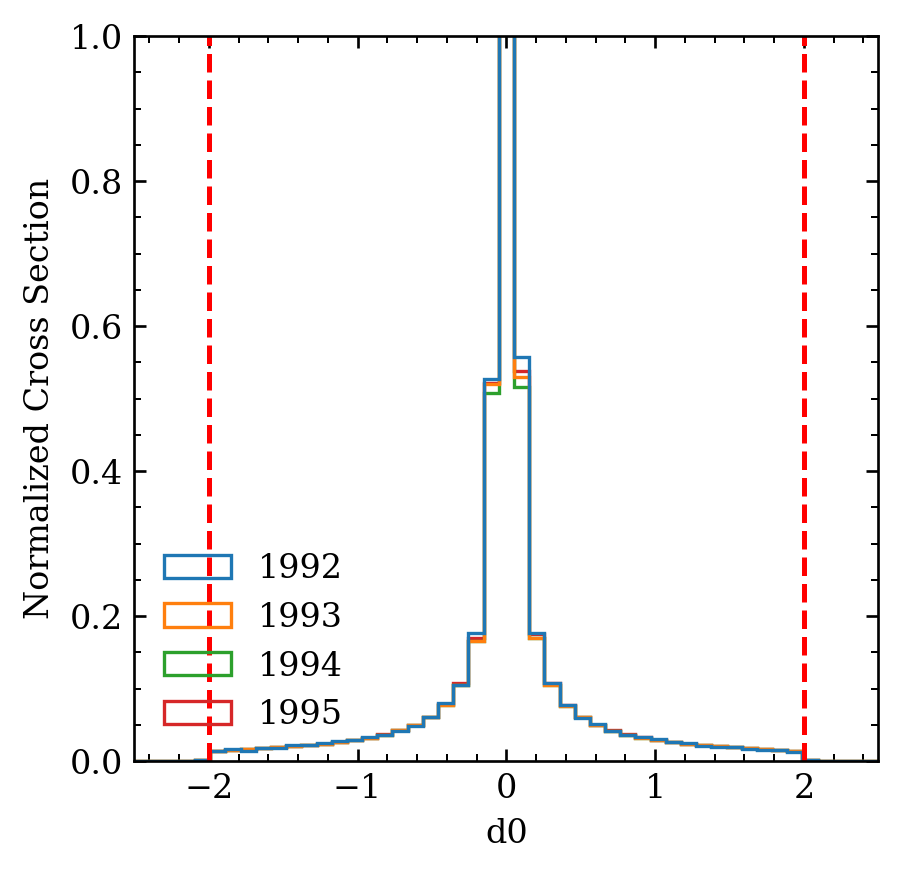

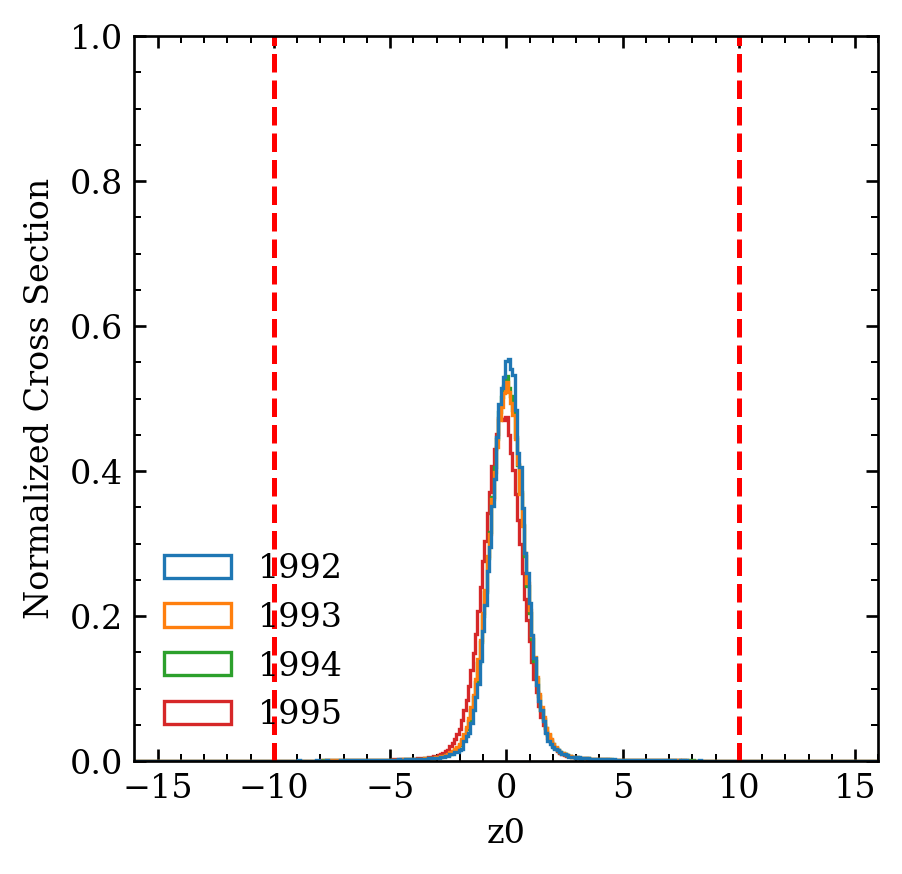

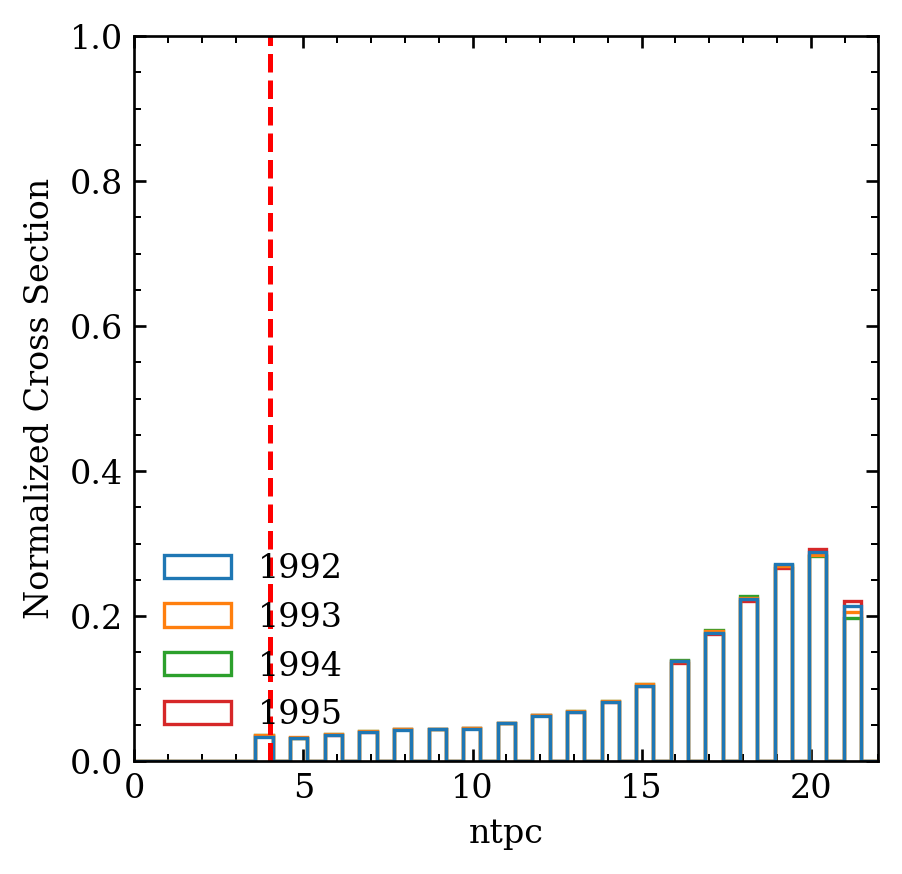

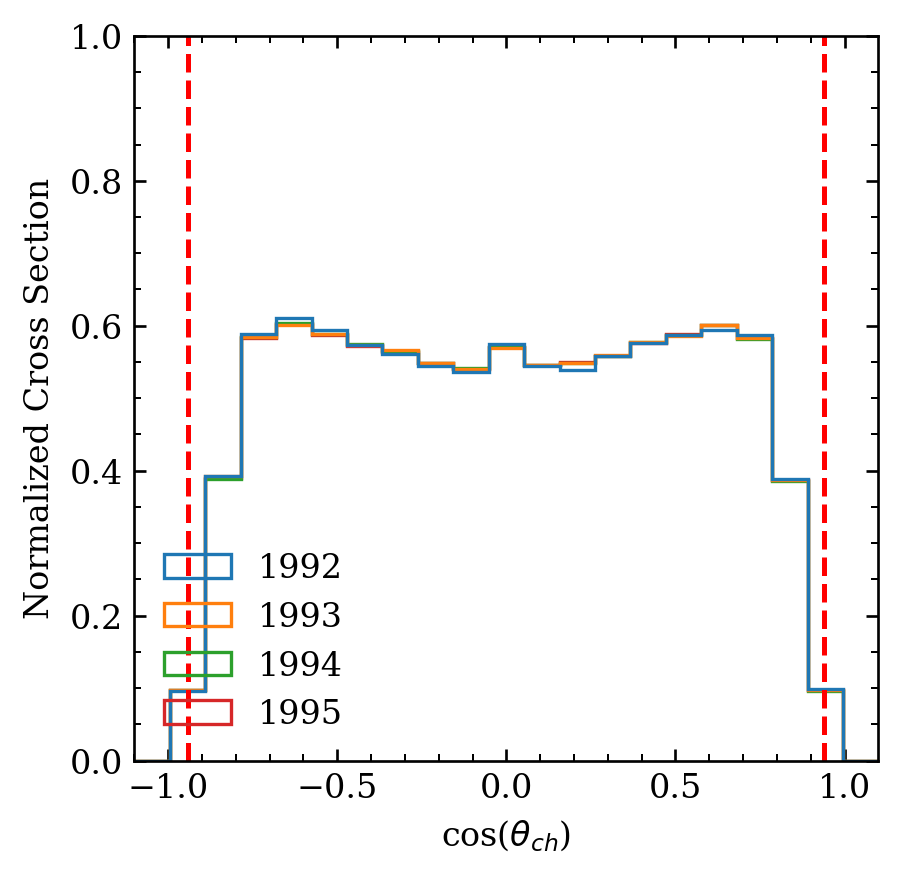

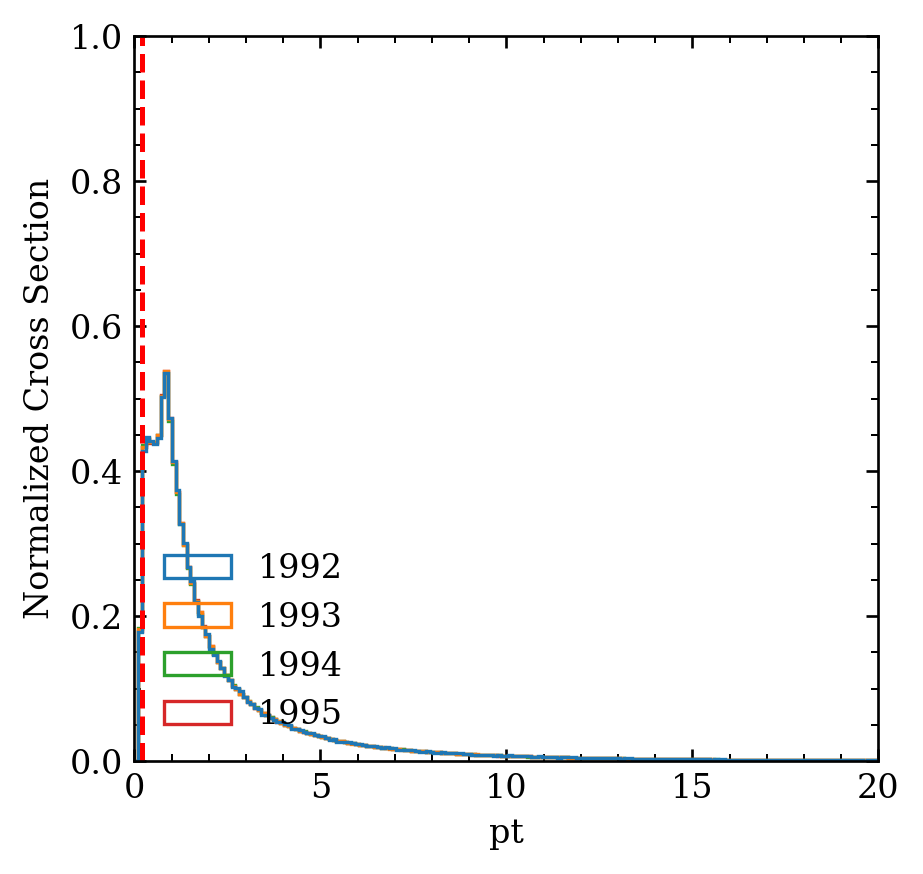

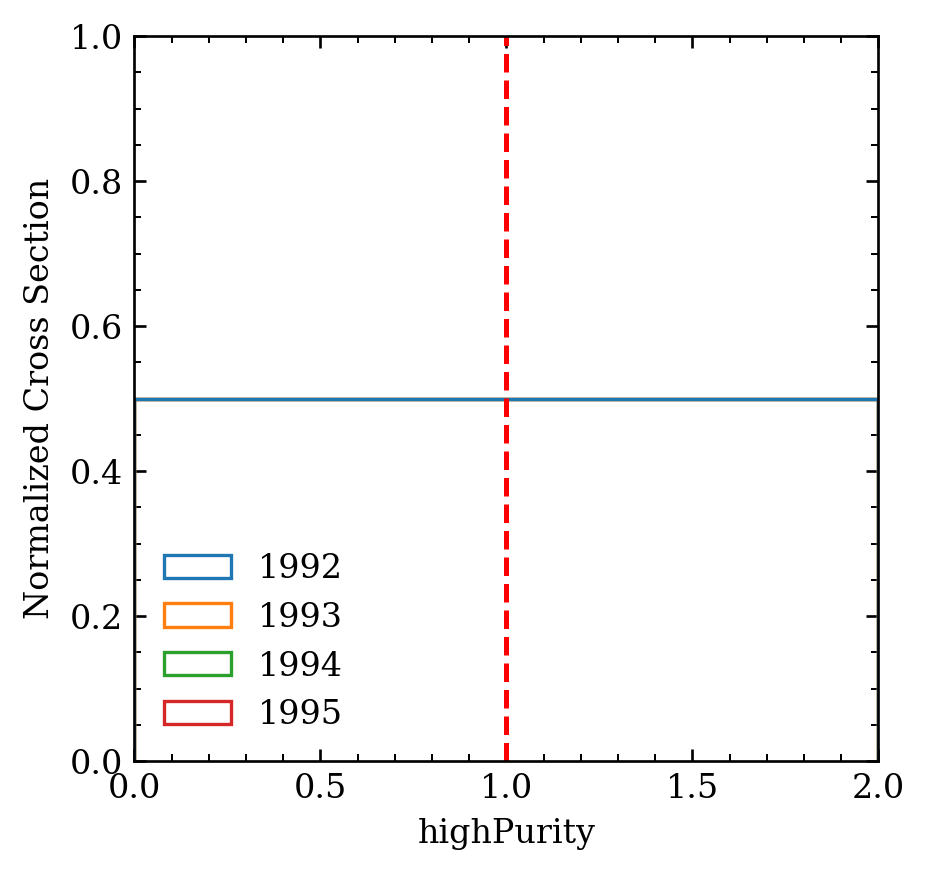

In [206]:
for key in trkSel.keys():
    # get the styled axes on which to plot
    if key == '': continue
    ob = trkSel_hists[key]
    fig, [ax0] = modplot.axes(**ob)
    bins = np.linspace(trkSel_xLims[key][0][0], trkSel_xLims[key][0][1], trkSel_xLims[key][1])
    cut = trkSel[key][0]
    hist_data = []
    for year in years:
        # load the data file and the branch
        data_file = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
        data = np.asarray(data_file['t'][key].array().flatten())
        # modify the data depending on the key
        if key == 'highPurity': 
            data = [int(i) for i in data]
            data = np.asarray(data)
        if key == 'theta':
            # only used charged tracks pwflag = 0,1,2
            mask = [i in [0,1,2] for i in np.asarray(data_file['t']['pwflag'].array().flatten())]
            data = data[mask]
            data = np.cos(data)
        if key == 'pwflag':
            pwflag_counts[year] = [(data==i).sum() for i in range(0,6)]
        # append to the data list for plotting
        hist_data.append(data)
        
        # fill in track selection dictionary with the number of tracks and the % passing selection
        counts[key].append(len(data))
        if key in ['pwflag','d0','z0','theta']:
            counts[key].append((abs(data)<=cut).sum()/len(data))
        elif key == 'highPurity':
            counts[key].append((data).sum()/len(data)) # highPurity is a bit so no need to compare
        else:
            counts[key].append((data>=cut).sum()/len(data))
    ax0.hist(hist_data, bins, **histStyle, label=years)
    ax0.plot([-cut,-cut], [0,1], '--', color='red')
    ax0.plot([cut,cut], [0,1], '--', color='red')
    # legend style and ordering
    loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 2)
    order = [3,2,1,0]
    modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)
    if key in ['']: 
        ax0.set_yscale('log')
    fig.savefig('CutStudyPlots/{}.pdf'.format(key), bbox_inches='tight')
    plt.show()

In [207]:
# construct the data frame
pwflag_df = pd.DataFrame.from_dict(pwflag_counts)
pwflag_df.set_index('')

,1992,1993,1994,1995
,,,,
CHARGED_TRACK,250652,9642088,24428785,10651375
CHARGED_LEPTONS1,7893,312210,790739,337997
CHARGED_LEPTONS2,3026,115119,289704,127100
V0,28,1133,2817,1209
PHOTON,110281,4223052,10454701,4662156
NEUTRAL_HADRON,40957,1613812,4084968,1776377


In [208]:
x = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
y = np.asarray(data_file['t']['ntpc'].array().flatten())
print((y<=4.0).sum()/len(data))
print((y==-127.0).sum()/len(data))

0.36673812474603007
0.36673812474603007


In [211]:
counts_df = pd.DataFrame.from_dict(counts)
counts_df = counts_df.set_index('')
counts_df.columns = ['pwflag','d0','z0','ntpc','charged theta','pt','highPurity']
counts_df

,pwflag,d0,z0,ntpc,charged theta,pt,highPurity
,,,,,,,
Cut,2.000000e+00,2.000000e+00,1.000000e+01,4.000000e+00,9.400000e-01,2.000000e-01,1.000000e+00
1992,4.128370e+05,4.128370e+05,4.128370e+05,4.128370e+05,2.615710e+05,4.128370e+05,4.128370e+05
% w/ Cut,6.335939e-01,6.336617e-01,6.336617e-01,6.336617e-01,9.999771e-01,9.831192e-01,9.830296e-01
1993,1.590741e+07,1.590741e+07,1.590741e+07,1.590741e+07,1.006942e+07,1.590741e+07,1.590741e+07
% w/ Cut,6.330015e-01,6.330727e-01,6.330727e-01,6.330727e-01,9.999800e-01,9.825680e-01,9.824973e-01
1994,4.005171e+07,4.005171e+07,4.005171e+07,4.005171e+07,2.550923e+07,4.005171e+07,4.005171e+07
% w/ Cut,6.369073e-01,6.369776e-01,6.369776e-01,6.369776e-01,9.999827e-01,9.825122e-01,9.824287e-01
1995,1.755621e+07,1.755621e+07,1.755621e+07,1.755621e+07,1.111647e+07,1.755621e+07,1.755621e+07
% w/ Cut,6.331930e-01,6.332619e-01,6.332619e-01,6.332619e-01,9.999831e-01,9.828150e-01,9.827427e-01
